<h1><a href='https://www.kaggle.com/c/30-days-of-ml/overview'>30 Days of ML competition</a></h1>

# 1. Import Libraries 

In [1]:
# Familiar imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For ordinal encoding categorical variables, splitting data
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# For training random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import recall_score, f1_score, confusion_matrix, classification_report

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 2. Exploratory data analysis

## Load data

In [3]:
# Load the training data
train = pd.read_csv("../input/30-days-of-ml/train.csv", index_col=0)
test = pd.read_csv("../input/30-days-of-ml/test.csv", index_col=0)

In [4]:
train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,B,B,B,C,B,B,A,E,C,N,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
2,B,B,A,A,B,D,A,F,A,O,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
3,A,A,A,C,B,D,A,D,A,F,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
4,B,B,A,C,B,D,A,E,C,K,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
6,A,A,A,C,B,D,A,E,A,N,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [5]:
train.shape

(300000, 25)

In [6]:
train.dtypes.value_counts()

float64    15
object     10
dtype: int64

## Define target and features

In [7]:
# Separate target from features
y = train['target']
features = train.drop(['target'], axis=1)

# Preview features
features.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,
1,B,B,B,C,B,B,A,E,C,N,...,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
2,B,B,A,A,B,D,A,F,A,O,...,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
3,A,A,A,C,B,D,A,D,A,F,...,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846
4,B,B,A,C,B,D,A,E,C,K,...,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682
6,A,A,A,C,B,D,A,E,A,N,...,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823


## Categorical data

In [8]:
# List of categorical columns
object_cols = [col for col in features.columns if 'cat' in col]

## View missing data 

<AxesSubplot:ylabel='id'>

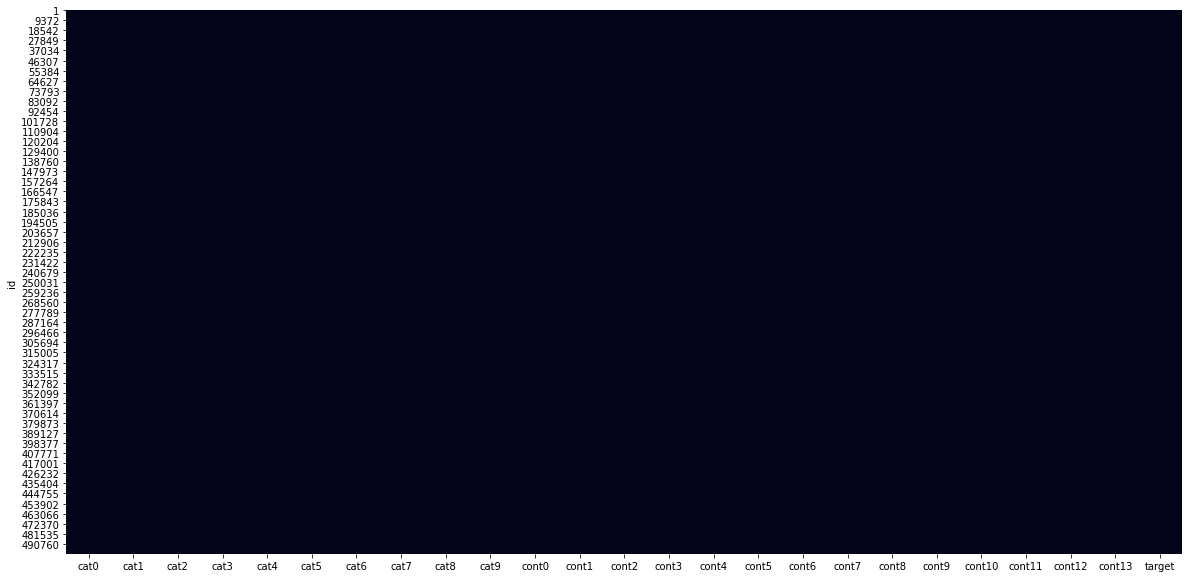

In [9]:
plt.figure(figsize=(20, 10))
sns.heatmap(train.isna(), cbar=False)

#### No missing data

## View target

In [10]:
y.dtype

dtype('float64')

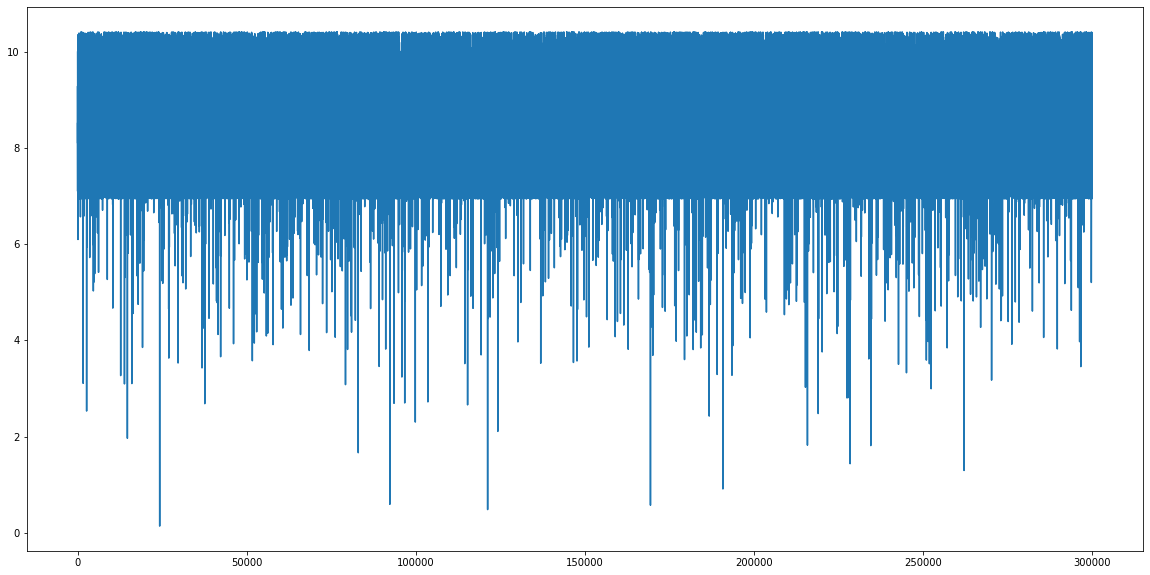

In [11]:
plt.figure(figsize=(20, 10))
plt.plot(y.values)

## View numeric data

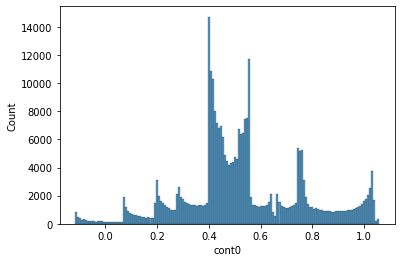

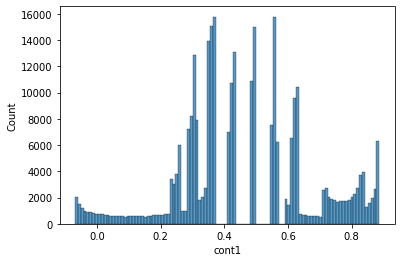

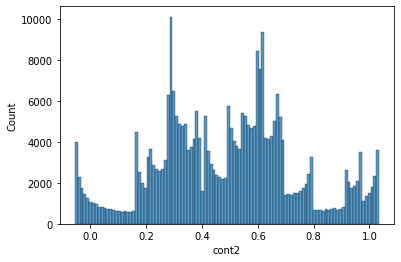

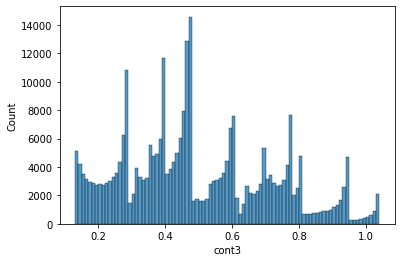

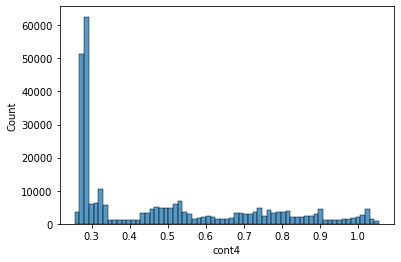

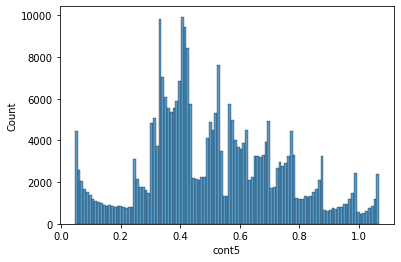

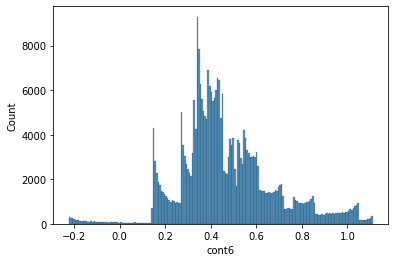

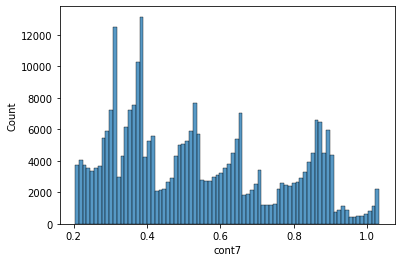

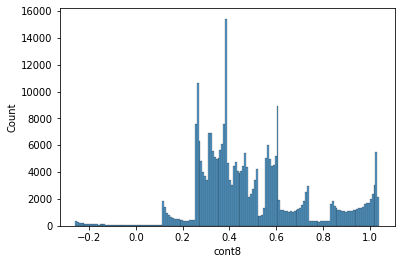

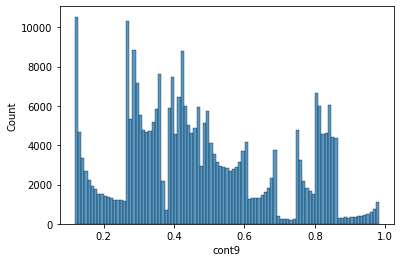

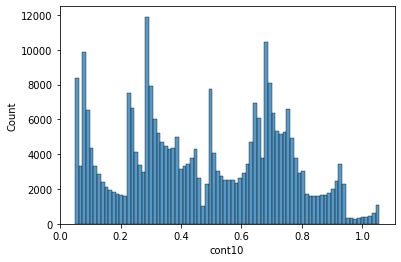

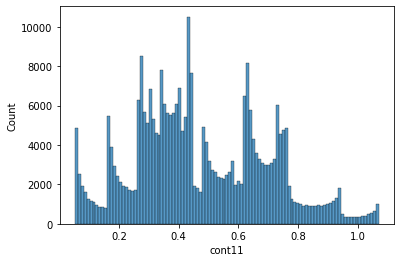

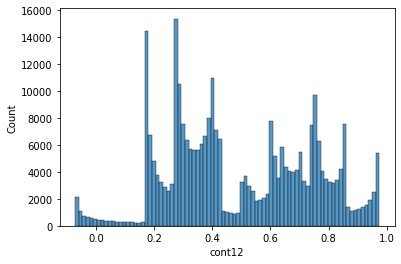

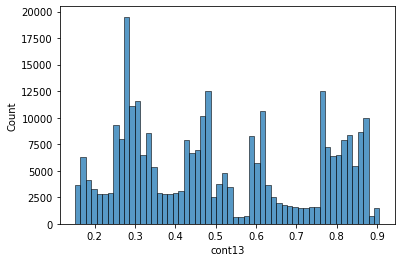

In [12]:
for col in features.select_dtypes('float'):
    plt.figure()
    sns.histplot(features[col])

## View categorical data

In [13]:
for col in features.select_dtypes('object'):
    print(f'{col :-<50}{features[col].unique()}')

cat0----------------------------------------------['B' 'A']
cat1----------------------------------------------['B' 'A']
cat2----------------------------------------------['B' 'A']
cat3----------------------------------------------['C' 'A' 'D' 'B']
cat4----------------------------------------------['B' 'C' 'A' 'D']
cat5----------------------------------------------['B' 'D' 'C' 'A']
cat6----------------------------------------------['A' 'B' 'C' 'H' 'D' 'I' 'G' 'E']
cat7----------------------------------------------['E' 'F' 'D' 'B' 'G' 'C' 'A' 'I']
cat8----------------------------------------------['C' 'A' 'G' 'E' 'F' 'D' 'B']
cat9----------------------------------------------['N' 'O' 'F' 'K' 'M' 'I' 'G' 'H' 'L' 'B' 'A' 'J' 'D' 'C' 'E']


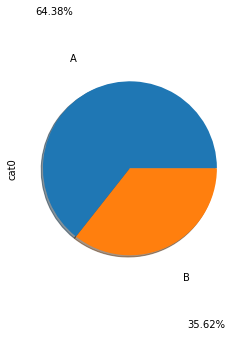

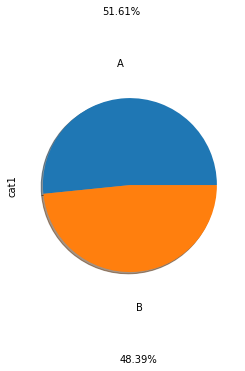

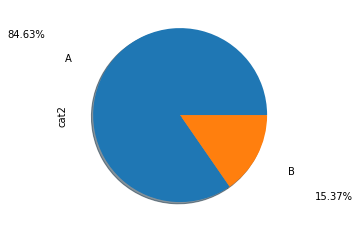

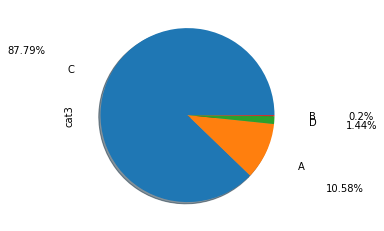

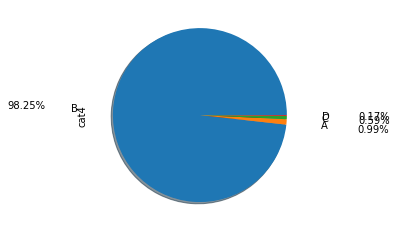

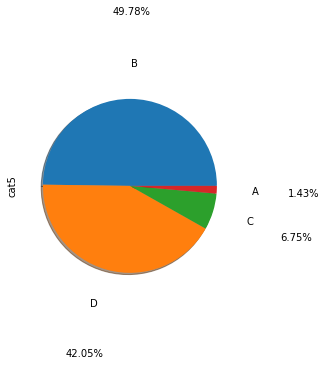

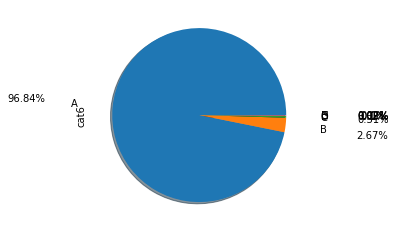

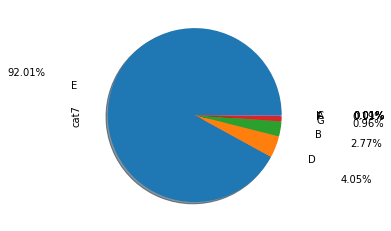

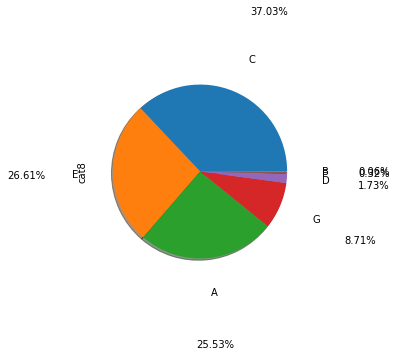

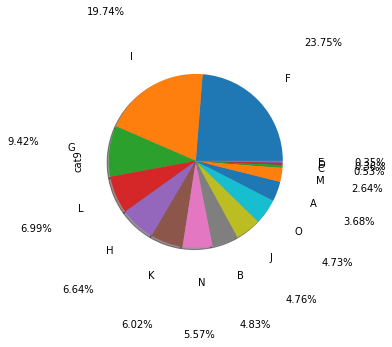

In [14]:
for col in features.select_dtypes('object'):
    plt.figure()
    x = features[col].value_counts()
    features[col].value_counts().plot.pie(autopct = lambda x: str(round(x, 2)) + '%', 
                                          pctdistance = 2, labeldistance = 1.4,
                                           shadow = True)

## Correlation between features

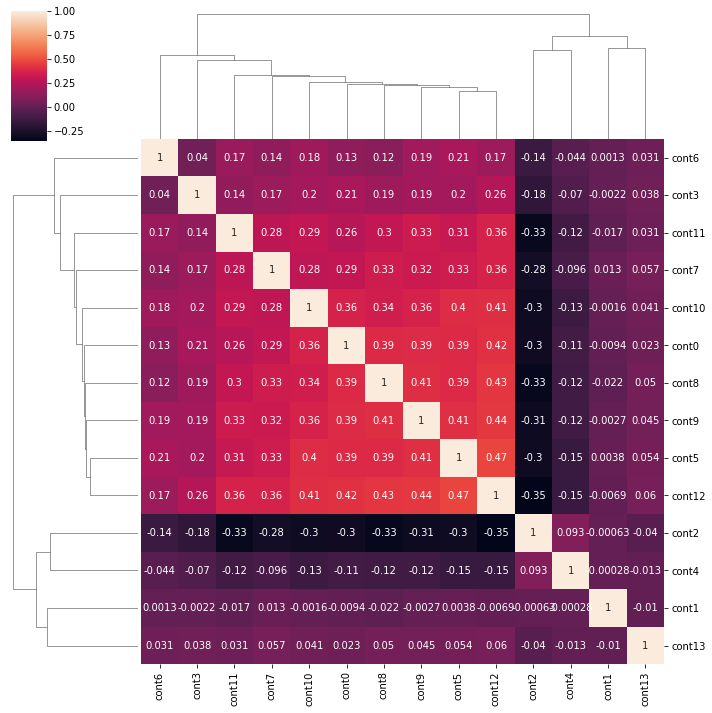

In [15]:
sns.clustermap(features.corr(), cbar=True, annot=True)

# 3. Data preprocessing

## Encode categorical features 

In [16]:
# ordinal-encode categorical columns
X = features.copy()
X_test = test.copy()
ordinal_encoder = OrdinalEncoder()
X[object_cols] = ordinal_encoder.fit_transform(features[object_cols])
X_test[object_cols] = ordinal_encoder.transform(test[object_cols])


## Divide data into trainset and validationset

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

In [18]:
X_train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,
412957,0.0,0.0,0.0,2.0,1.0,2.0,0.0,3.0,6.0,7.0,...,0.284988,0.777432,0.391158,0.575325,0.449008,0.808493,0.638874,0.620083,0.860327,0.796654
282449,0.0,0.0,0.0,2.0,1.0,1.0,0.0,4.0,4.0,8.0,...,0.979303,0.388542,0.392169,0.251943,0.257683,0.289205,0.753284,0.108515,0.223745,0.867225
164867,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,5.0,14.0,...,0.528495,0.877585,0.692778,0.394110,0.372842,0.603872,0.729337,0.572204,0.381617,0.528454
541,0.0,1.0,0.0,2.0,1.0,1.0,0.0,4.0,4.0,6.0,...,0.795973,0.254421,0.279979,0.244269,0.549558,0.318729,0.093974,0.428488,0.176486,0.250280
80790,1.0,1.0,0.0,2.0,1.0,3.0,0.0,4.0,0.0,8.0,...,0.809695,0.412479,0.345747,0.537579,1.023082,0.433388,0.814753,0.655539,0.923203,0.467355


# 4. Train a models

## Define models

In [19]:
def evaluation(model):
    model.fit(X_train, y_train)
    preds_valid = model.predict(X_valid)
   
    print(mean_squared_error(y_valid, preds_valid, squared=False))
    

In [20]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

LR_model = make_pipeline(preprocessor, LinearRegression())
RandomForest_model = make_pipeline(preprocessor, RandomForestRegressor())
DecisionTreeRegressor_model = make_pipeline(preprocessor, DecisionTreeRegressor())

list_models = {'LR_model' : LR_model, 
               'RandomForest_model' : RandomForest_model,
               'DecisionTreeRegressor_model' : DecisionTreeRegressor_model}

for name, model in list_models.items():
    print(name)
    #evaluation(model)

LR_model
RandomForest_model
DecisionTreeRegressor_model


### XGBRegressor

#### Search for the best hyperparameters

In [21]:
para = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]}

XGBRegressor_model = XGBRegressor()
clf = RandomizedSearchCV(XGBRegressor_model, para, random_state=0)

#search = clf.fit(X_train, y_train)
#search.best_params_

In [22]:
#preds_valid = search.best_estimator_.predict(X_valid)

#print(mean_squared_error(y_valid, preds_valid, squared=False))

#### BaggingRegressor

In [23]:
from sklearn.ensemble import BaggingRegressor

best_para = {'min_child_weight': 7,
 'max_depth': 4,
 'learning_rate': 0.3,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

regr = BaggingRegressor(base_estimator=XGBRegressor(**best_para), n_estimators=10, random_state=0)

#regr.fit(X_train, y_train, eval_metric = "rmse", early_stopping_rounds = 50)
#preds_valid = regr.predict(X_valid)
   
#print(mean_squared_error(y_valid, preds_valid, squared=False))

In [24]:
xgb_params = {
    'booster': 'gbtree',
    'n_estimators': 10000,
    'learning_rate': 0.05,
    'reg_lambda': 10,
    'reg_alpha': 26,
    'subsample': 0.9,
    'colsample_bytree': 0.12,
    'max_depth': 3,
    'random_state': 0
}

regr = XGBRegressor(**xgb_params)

regr.fit(X_train, y_train, eval_metric = "rmse")
preds_valid = regr.predict(X_valid)
   
print(mean_squared_error(y_valid, preds_valid, squared=False))

0.7190949999816758


In [25]:
# Use the model to generate predictions
predictions = regr.predict(X_test)

# Save the predictions to a CSV file
output = pd.DataFrame({'Id': X_test.index,
                       'target': predictions})
output.to_csv('submission.csv', index=False)